# Lista 07 - Matheus Carvalho - 231708017

In [97]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Questão 01

Eu vi na documentação, que na teoria, a proporção dos da seria a indicada no enunciado. Por algum motivo, o modelo não rodava de jeito nenhum. Decidi ignorar o conjunto de teste dado pelo método `cifar10.load_data()` e extrair do conjunto de treino uma parcela para formar o conjunto de testes e, por consequência, o conjunto de validação. Foi bem interessante fazer essa tarefa nesse momento. Embora o professor Pacannaro não tenha se aprofundado em redes convulacionais, entender o que estava acontecendo na hora de criar, treinar e usar a rede, fez muito mais sentido. Certamente, sem a bagagem teórica adiquirida ao longo do terceiro período de Cência de Dados, seria praticamnte inviável fazer a tarefa.

In [52]:
# Carregar o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [53]:
# vou usar 83% dos dados para treino e 17% para teste
num_train = int(0.83 * len(x_train))
x_train, x_test = x_train[:num_train], x_train[num_train:]
y_train, y_test = y_train[:num_train], y_train[num_train:]

In [54]:
# usar os dados de teste como validação
x_val = x_test.copy()
y_val = y_test.copy()

In [55]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [56]:
# vai verificar o shape dos dados
print(f'Treinamento: {x_train.shape}, Validação: {x_val.shape}, Teste: {x_test.shape}')
print(f'{y_train.shape}, {y_val.shape}, {y_test.shape}')

Treinamento: (41500, 32, 32, 3), Validação: (8500, 32, 32, 3), Teste: (8500, 32, 32, 3)
(41500, 10), (8500, 10), (8500, 10)


## Questão 02

Nessa etapa, eu crio os modelos, com os parâmetros passados no enunciado. Configurando as camadas, as funções de ativação, logo abaixo as métricas de erro e em seguida o resumo.

In [57]:
# momento em que a rede é construída 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# relatório/resumo do que foi feito
model.summary()

c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,802 (600.79 KB)

 Trainable params: 153,802 (600.79 KB)

 Non-trainable params: 0 (0.00 B)

## Questão 03

Nessa etapa, o modelo de fato é treinado. Passamos o conjunto de treino, os targets, o número de epoch (iterações no conjunto de treino), batch_size (nesse modelo ele usa o mimi-batch que é semelhante a SGD, mas com um conjunto maior) e os dados de validação.

In [58]:
# treinar o modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# avaliar o modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia Para o Conjunto de Teste: {test_accuracy:.4f}')

Epoch 1/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.1856 - loss: 2.6266 - val_accuracy: 0.3513 - val_loss: 1.7717
Epoch 2/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.3829 - loss: 1.7103 - val_accuracy: 0.3953 - val_loss: 1.6938
Epoch 3/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.4321 - loss: 1.5692 - val_accuracy: 0.4469 - val_loss: 1.5260
Epoch 4/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.4687 - loss: 1.4705 - val_accuracy: 0.4784 - val_loss: 1.4688
Epoch 5/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5095 - loss: 1.3674 - val_accuracy: 0.4871 - val_loss: 1.4116
Epoch 6/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5322 - loss: 1.3056 - val_accuracy: 0.5066 - val_loss: 1.3876
Epoch 7/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5612 - loss: 1.2300 - val_accuracy: 0.5046 - val_loss: 1.4106
Epoch 8/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5915 - loss: 1.1540 - 

## Questão 04

Meu objetivo aqui vai ser fazer três previsões. Das três, duas deram certo e uma deu errado. Não faço ideia do porque ele tá classificando a imagem como um caminhão sendo que é um cavalo, mas faz parte. Inicialmente, eu carrego as imagens nas respectivas células, logo em seguida uso o modelo treinado e, então, mostro a previsão. 

In [78]:
class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


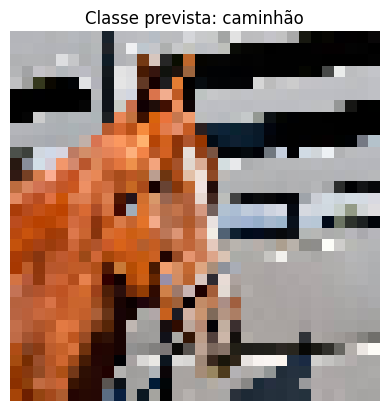

In [90]:
img_path_1 = 'C:/Users/mathe/Projetos/FGV_CD_3P/VisaoComputacional/Listas/Lista 07/cavalo.png'
img_1 = image.load_img(img_path_1, target_size=(32, 32))
img_array_1 = image.img_to_array(img_1)
img_array_1 = np.expand_dims(img_array_1, axis=0)

predictions_1 = model.predict(img_array_1)
predicted_class_1 = np.argmax(predictions_1)

plt.imshow(img_1)
plt.axis('off')
plt.title(f'Classe prevista: {class_names[predicted_class_1]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


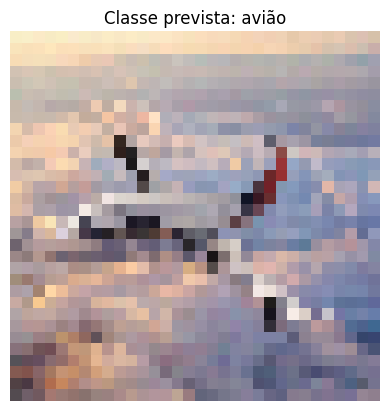

In [87]:
img_path_2 = 'C:/Users/mathe/Projetos/FGV_CD_3P/VisaoComputacional/Listas/Lista 07/aviao.png'
img_2 = image.load_img(img_path_2, target_size=(32, 32))
img_array_2 = image.img_to_array(img_2)
img_array_2 = np.expand_dims(img_array_2, axis=0)

predictions_2 = model.predict(img_array_2)
predicted_class_2 = np.argmax(predictions_2)

plt.imshow(img_2)
plt.axis('off')
plt.title(f'Classe prevista: {class_names[predicted_class_2]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


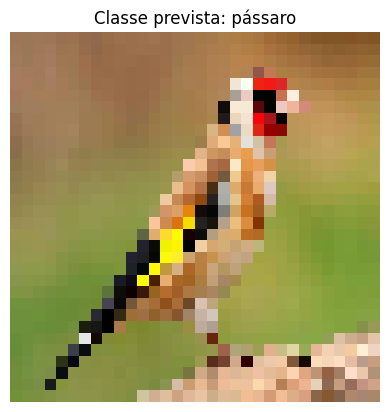

In [89]:
img_path_3 = 'C:/Users/mathe/Projetos/FGV_CD_3P/VisaoComputacional/Listas/Lista 07/passaro.png'
img_3 = image.load_img(img_path_3, target_size=(32, 32))
img_array_3 = image.img_to_array(img_3)
img_array_3 = np.expand_dims(img_array_3, axis=0)

predictions_3 = model.predict(img_array_3)
predicted_class_3 = np.argmax(predictions_3)

plt.imshow(img_3)
plt.axis('off')
plt.title(f'Classe prevista: {class_names[predicted_class_3]}')
plt.show()

## Questão 05

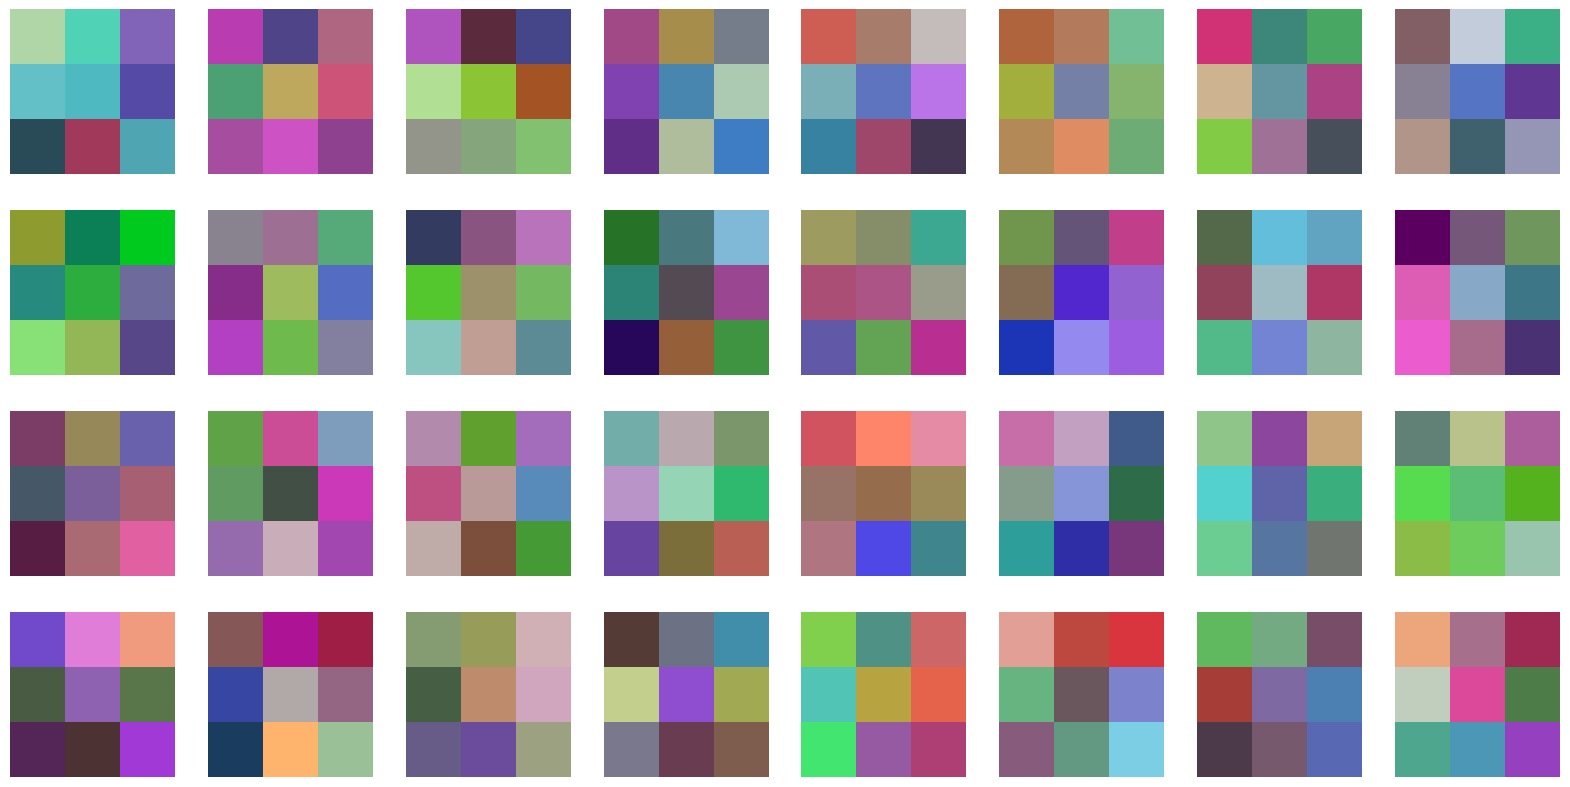

In [95]:
# Obter os pesos dos filtros da primeira camada convolucional
primeira_camada = model.layers[0]
filtros, bias = primeira_camada.get_weights()

# normalizar os valores dos filtros para que possam ser exibidos
f_min, f_max = filtros.min(), filtros.max()
filtros = (filtros - f_min) / (f_max - f_min)

# números de filtros pedidos no enunciado 
num_filtros = 32

# cria um subplot com 4 linhas e 8 colunas
fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for i in range(num_filtros):
    # apenas uma forma de iterar sobre os eixos
    ax = axes[i // 8, i % 8]
    # mostra o filtro i
    ax.imshow(filtros[:, :, :, i])
    # remover os eixos
    ax.axis('off')

plt.show()

## Questão 06

Uma tarefa, assim como disse acima, lembra os Labs e Tarefas de TACD. Muitas das funções, das ideias e das técnicas por trás já foram apresentadas para mim ao longo do curso. Tentei comentar de forma clara o que foi feito, não tem muito segredo. O nível de complexidade que eu vou alterando é o número de neurênios da primeira camada. 

c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


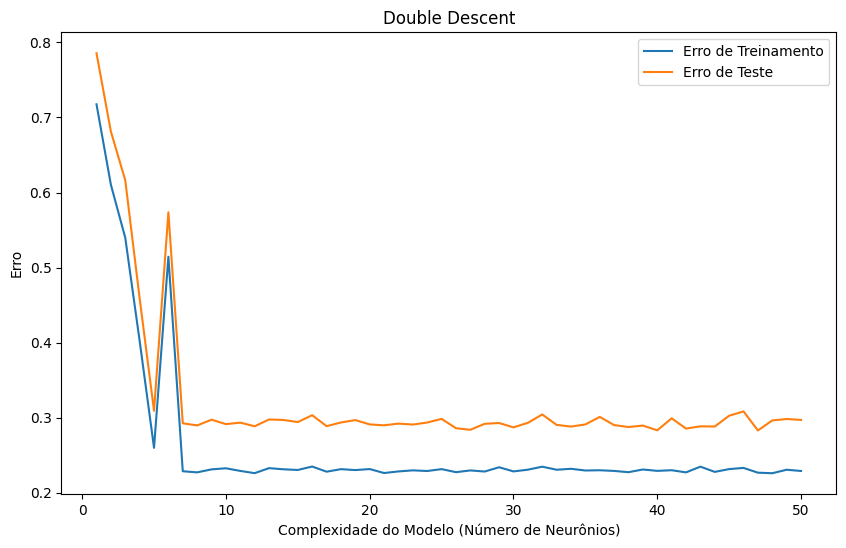

In [98]:
# vou gerar dados sintéticos
np.random.seed(42)
X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.sin(5 * X) + 0.5 * np.random.randn(1000, 1)

# uso a função train_test_split para dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# essa é apenas uma forma de normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# uma função que cria um modelo com certa complexidade
# essa função vai ser usada abaixo dentro de um loop 
# para criar modelos com diferentes complexidades
def modelo_complexidade(numero_de_unidades):
    modelo = Sequential([
        # como função de ativação vou usar a ReLU
        Dense(numero_de_unidades, activation='relu', input_shape=(1,)),
        Dense(numero_de_unidades, activation='relu'),
        Dense(1)
    ])
    # vou usar como metrica de erro o mean squared error
    modelo.compile(optimizer='adam', loss='mse')
    return modelo

# variáveis para armazenar os erros
train_errors = []
test_errors = []
complexities = range(1, 51)

# vai criando cada vez mais modelos mais complexos
for units in complexities:
    model = modelo_complexidade(units)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    train_errors.append(model.evaluate(X_train, y_train, verbose=0))
    test_errors.append(model.evaluate(X_test, y_test, verbose=0))

# apenas a plotagem dos erros
plt.figure(figsize=(10, 6))
plt.plot(complexities, train_errors, label='Erro de Treinamento')
plt.plot(complexities, test_errors, label='Erro de Teste')
plt.xlabel('Complexidade do Modelo (Número de Neurônios)')
plt.ylabel('Erro')
plt.legend()
plt.title('Double Descent')
plt.show()